In [1]:
import os
import math

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=URL, extract=True)

In [4]:
zip_dir_base = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
!find $zip_dir_base -type d -print

train_dir = os.path.join(zip_dir_base, 'train')
validation_dir = os.path.join(zip_dir_base, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
m_train_cats = len(os.listdir(train_cats_dir))
m_train_dogs = len(os.listdir(train_dogs_dir))
m_train = m_train_cats + m_train_dogs
m_val_cats = len(os.listdir(validation_cats_dir))
m_val_dogs = len(os.listdir(validation_dogs_dir))
m_val = m_val_cats + m_val_dogs
print("Training set has {} cats and {} dogs.".format(m_train_cats, m_train_dogs))
print("Validation set has {} cats and {} dogs.".format(m_val_cats, m_val_dogs))


/home/sean/.keras/datasets/cats_and_dogs_filtered
/home/sean/.keras/datasets/cats_and_dogs_filtered/validation
/home/sean/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/sean/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/sean/.keras/datasets/cats_and_dogs_filtered/train
/home/sean/.keras/datasets/cats_and_dogs_filtered/train/dogs
/home/sean/.keras/datasets/cats_and_dogs_filtered/train/cats
Training set has 1000 cats and 1000 dogs.
Validation set has 500 cats and 500 dogs.


In [5]:
BATCH_SIZE = 64
IMG_SHAPE = 150

In [6]:
train_img_generator = ImageDataGenerator(rescale=1/255.)
validation_img_generator = ImageDataGenerator(rescale=1/255.)

In [7]:
train_data_gen = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         class_mode='binary')
val_data_gen = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=train_dir,
                                                         shuffle=False,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
training_sample, _ = next(train_data_gen)

In [9]:
def show_many(imgs, count, rows, cols, size):
    plt.figure(figsize=size)
    for i in range(count):
        plt.subplot(rows, cols, i+1)
        plt.imshow(imgs[i])

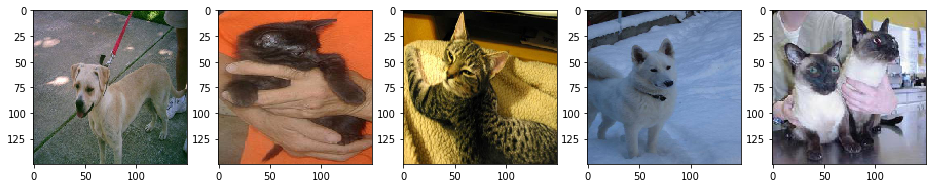

In [10]:
show_many(training_sample, 5, 1, 5, (16,16))

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


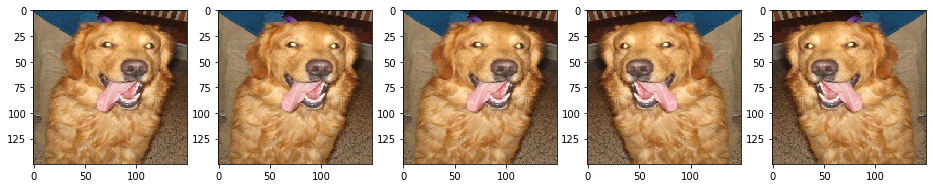

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (16,16))

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


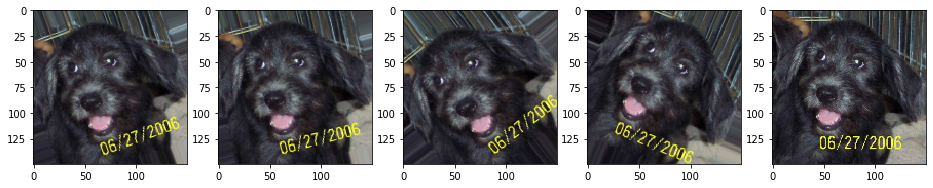

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (16,16))

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


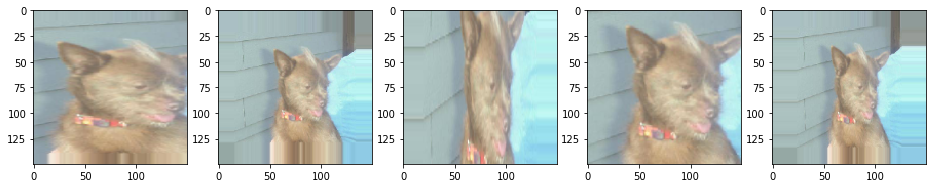

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (16,16))

In [17]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


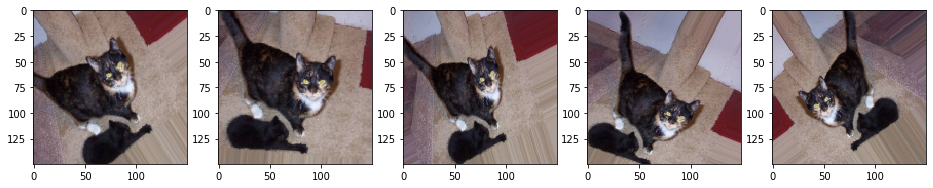

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
show_many(augmented_images, 5, 1, 5, (16,16))

In [19]:
L = [
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
]
model = tf.keras.models.Sequential(L)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
%%time
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(m_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(m_val / float(BATCH_SIZE))))

Epoch 1/30
32/32 [==============================] - 71s 2s/step - loss: 0.7223 - accuracy: 0.4930 - val_loss: 0.7200 - val_accuracy: 0.0234
Epoch 2/30
32/32 [==============================] - 60s 2s/step - loss: 0.6928 - accuracy: 0.5045 - val_loss: 0.6885 - val_accuracy: 0.8789
Epoch 3/30
32/32 [==============================] - 60s 2s/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6864 - val_accuracy: 0.9766
Epoch 4/30
32/32 [==============================] - 63s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.9766
Epoch 5/30
32/32 [==============================] - 61s 2s/step - loss: 0.6928 - accuracy: 0.5085 - val_loss: 0.7495 - val_accuracy: 0.0264
Epoch 6/30
32/32 [==============================] - 58s 2s/step - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.7267 - val_accuracy: 0.0254
Epoch 7/30
32/32 [==============================] - 57s 2s/step - loss: 0.6924 - accuracy: 0.5060 - val_loss: 0.6683 - val_accuracy: 0.9766
Epoch 8/30
32/32 [==

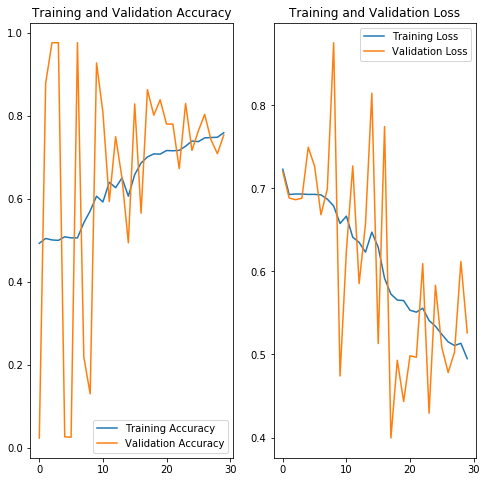

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()